In [1]:
import parflow as pf
import pandas as pd
import os
import plotly.express as px
from domain_files.tilted_v_with_reservoir import run_model
import matplotlib.pyplot as plt

The first thing we need to do is run the model

In [2]:
# Set the path to your parflow installation if you haven't already
# os.environ["PARFLOW_DIR"] = "/path/to/your/parflow/installation"
os.environ["PARFLOW_DIR"] = "/Users/ben/parflow_installation/parflow"

RAINING = -.001
NOT_RAINING = 0
RELEASING = 5
NOT_RELEASING = 0


run_name = "filling"
rain_rate_1 = RAINING
rain_rate_2 = RAINING
reservoir_release_rate = NOT_RELEASING
initial_storage = 25
run_model(run_name, rain_rate_1, rain_rate_2, reservoir_release_rate, initial_storage)

run_name = "draining"
rain_rate_1 = NOT_RAINING
rain_rate_2 = NOT_RAINING
reservoir_release_rate = RELEASING
initial_storage = 49
run_model(run_name, rain_rate_1, rain_rate_2, reservoir_release_rate, initial_storage)

run_name = "periodic_rainfall"
rain_rate_1 = RAINING
rain_rate_2 = NOT_RAINING
reservoir_release_rate = RELEASING
initial_storage = 40
run_model(run_name, rain_rate_1, rain_rate_2, reservoir_release_rate, initial_storage)


# ==============================================================================
# ParFlow directory
#  - /Users/ben/parflow_installation/parflow
# ParFlow version
#  - 3.13.0
# Working directory
#  - /Users/ben/Documents/GitHub/reservoir_test_cases/test_cases/idealized/test_output/filling
# ParFlow database
#  - tilted_v_with_reservoir.pfidb
# ==============================================================================


# ==============================================================================
# ParFlow ran successfully
# ==============================================================================


# ==============================================================================
# ParFlow directory
#  - /Users/ben/parflow_installation/parflow
# ParFlow version
#  - 3.13.0
# Working directory
#  - /Users/ben/Documents/GitHub/reservoir_test_cases/test_cases/idealized/test_output/draining
# ParFlow database
#  - tilted_v_with_reservoir.pfidb
# ================================

Next we plot the surface pressures for the final timestep

In [3]:
pressure = pf.read_pfb("./test_output/draining/tilted_v_with_reservoir.out.press.00009.pfb")
# pressure = pf.read_pfb("/Users/ben/Documents/GitHub/reservoir_test_cases/test_cases/idealized/test_output/filling/tilted_v_with_reservoir_initial_pressure.pfb")

px.imshow(pressure[0])

Next we get the data about the reservoir from the runs

In [4]:
# Get the data from the runs
output_directory = './test_output'

run_names = ["filling", "draining", "periodic_rainfall"]
run_data = {}
for run_name in run_names:
    run_data[run_name] = pd.read_csv(f"{output_directory}/{run_name}/ReservoirsOutput.csv")
run_data["draining"]

,time,name,storage,intake_amount_since_last_row,release_amount_since_last_row,release_rate
0,0.0,reservoir,49.000000,0.000000,0.0,5.0
1,1.0,reservoir,44.333465,0.333465,5.0,5.0
2,2.0,reservoir,39.371001,0.037536,5.0,5.0
3,3.0,reservoir,34.382592,0.011591,5.0,5.0
4,4.0,reservoir,29.387779,0.005187,5.0,5.0
5,5.0,reservoir,24.389692,0.001913,5.0,5.0
6,6.0,reservoir,24.390834,0.001142,0.0,5.0
7,7.0,reservoir,24.391444,0.000609,0.0,5.0
8,8.0,reservoir,24.391841,0.000398,0.0,5.0
9,9.0,reservoir,24.392115,0.000273,0.0,5.0


Finally, we plot the relevant reservoir variables for each of the runs. Note that due to an untimely harddrive failure the numbers here are tuned differently than in the paper. The broad behaviour however, remains the same.

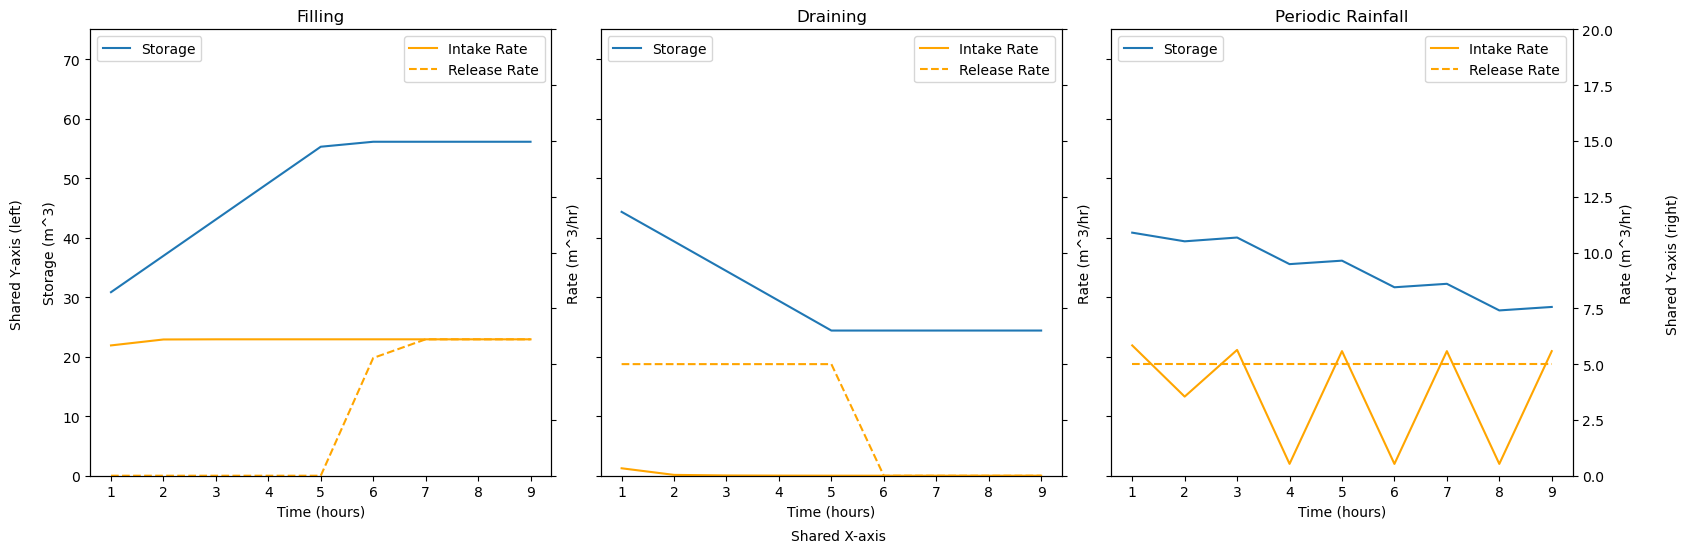

In [5]:
# Create a figure and a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(18, 6))

# Stubbed out locations for subfigure names
subfigure_names = ['Filling', 'Draining', 'Periodic Rainfall']

# Plotting dummy data and setting titles
for i, ax in enumerate(axs):
    run = run_data[run_names[i]]
    ax.set_ylim(0, 75)
    ax.plot(run['time'][1:10], run['storage'][1:10], label='Storage')  
    # add an x-axis label
    ax.set_xlabel('Time (hours)')
    ax.set_title(subfigure_names[i])
    if i == 0:
        ax.set_ylabel('Storage (m^3)')
    
    # Create a secondary y-axis
    ax_right = ax.twinx()
    ax_right.set_ylim(0, 20)
    ax_right.plot(run['time'][1:10], run['intake_amount_since_last_row'][1:10], label='Intake Rate', color='orange')
    ax_right.plot(run['time'][1:10], run['release_amount_since_last_row'][1:10], label='Release Rate', linestyle='--', color='orange')
    ax_right.set_ylabel('Rate (m^3/hr)')
    if i!=2:
        ax_right.set_yticklabels([])
    if i == 2:
        ax_right.set_ylabel('Rate (m^3/hr)')

    ax.legend(['Storage'], loc='upper left')
    ax_right.legend(['Intake Rate', 'Release Rate'], loc='upper right')

# Adding shared y-axis labels
fig.text(0.5, 0.04, 'Shared X-axis', ha='center')
fig.text(0.04, 0.5, 'Shared Y-axis (left)', va='center', rotation='vertical')
fig.text(0.96, 0.5, 'Shared Y-axis (right)', va='center', rotation='vertical')

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# Show the plot
plt.show()